# Assignment 2.1

Name: Steve Amancha  
Date: May 16 2023

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 2.1.

For the rain simulation example in Section 2.1.1, but with probability of rain 0.30 on any
given day, simulate the outcome (a) on the next day, (b) the next 10 days. (c) Simulate the
proportion of days of rain for the next (i) 100 days, (ii) 10,000 days, (iii) 1,000,000 days. Use
the simulation to explain the long-run relative frequency definition of probability.

`(a)`

In [435]:
import random
import scipy.stats as stats
import pandas as pd
import numpy as np
from itertools import permutations
import seaborn as sns
import matplotlib.pyplot as plt

# Created a function to simulate which days it rained within a range of given days and a known probability
def simulate_rainy_days(prob, days_range):
    # Keeping track of days rained
    days_rained = 0
    days_rained_array = []
    
    for day in range(days_range):
        # For each day generate a number between 0 and 1 and compare it with the probability
        if random.random() < prob:
            days_rained+= 1
            days_rained_array.append("Rained")
        else:
            days_rained_array.append("No Rain")

    return days_rained

# Writing down givens and calling the function
rain_probability = 0.3
num_days = 1
rain_bool = simulate_rainy_days(rain_probability, num_days)
print("Did tomorrow rain? 1 suggests it did.", rain_bool)


Did tomorrow rain? 1 suggests it did. 1


`(b)`
the next 10 days


In [107]:
num_days = 10
# Running same function with a new number of days
days_rained = simulate_rainy_days(rain_probability, num_days)
print(days_rained)

Range of days:  10
2


`(c)`

In our simulation, we assume that the probability of rain is 0.3 (30%). As the number of simulated days increases, the proportion of rainy days approaches the true probability of rain (0.3) in the long run. This means that if we continue the simulation for an infinite number of days, the proportion of rainy days will converge to the true probability of rain.




In [441]:
def simulate_rain_probability(num_days):
    # Simulate the occurrence of rain (1 for rain, 0 for no rain)
    times_rained = np.random.binomial(num_days, 0.3)

    # Calculate the proportion of rainy days
    rain_proportion = times_rained / num_days
    
    return rain_proportion

# Number of days for each simulation
num_days_1 = 100
num_days_2 = 10000
num_days_3 = 1000000

# Simulate the proportion of rainy days for each number of days
rain_proportion_1 = simulate_rain_probability(num_days_1)
rain_proportion_2 = simulate_rain_probability(num_days_2)
rain_proportion_3 = simulate_rain_probability(num_days_3)

print("for", num_days_1, "days the proportion of days rained was", rain_proportion_1)
print("for", num_days_2, "days the proportion of days rained was", rain_proportion_2)
print("for", num_days_3, "days the proportion of days rained was", rain_proportion_3)

for 100 days the proportion of days rained was 0.31
for 10000 days the proportion of days rained was 0.2992
for 1000000 days the proportion of days rained was 0.300343


## Problem # 2.2.

Data analysts often implement statistical inference methods by setting the probability of a
correct inference equal to 0.95. Let *A* denote the event that an inference for the population
about men is correct. Let *B* represent the event of a corresponding inference about women
being correct. Suppose that these are independent events.


(a) Find the probability that (i) *both* inferences are correct, (ii) *neither* inference is correct.  
(b) Construct the probability distribution for *Y* = number of correct inferences.  
(c) With what probability would each inference need to be correct in order for the probability to be 0.95 that *both* are correct?



`(a)`

Probability that both inferences about men and women are correct is approximately 0.9025 or 90.25%.

Probability that neither inferences about men and women are correct is approximately 0.098 or 9.8%.

In [200]:
# infered correct inference equal to men and women 0.95
men_correct_prob = 0.95
women_correct_prob = 0.95

# Both inferences are correct using multiplaction rule
both_correct_prob = men_correct_prob * women_correct_prob

# neither inference is correct
neither_correct_prob = 1 - both_correct_prob

print("Both Correct: ", round(both_correct_prob, 4))
print("Neither Correct: ", round(neither_correct_prob, 3))

Both Correct:  0.9025
Neither Correct:  0.098


`(b)`

In [444]:

# Number of inferences
n = 2

# Probability of success (correct inference)
p = 0.95

# Construct the probability distribution for Y
prob_dist = stats.binom(n, p)

# Calculate the PMF for each possible value of Y
probabilities = [prob_dist.pmf(k) for k in range(n+1)]

# Print the probability distribution
for k, prob in enumerate(probabilities):
    r_prob = round(prob,4)
    print(f'Y = {k}: {r_prob}')    

Y = 0: 0.0025
Y = 1: 0.095
Y = 2: 0.9025


`(c)`  
Each inference would need be 0.975 in order for the probability to be 0.95 that *both* are correct.

I verified using my code in A by changing their correct_prob values. 

In [70]:
def calculate_inference_threshold(target_probability):
    inference_threshold = np.sqrt(target_probability)
    return inference_threshold

# Target probability for both inferences being correct
target_probability = 0.95

# Calculate the probability threshold for each inference
inference_threshold = calculate_inference_threshold(target_probability)

# Print the probability threshold for each inference
print(f"The probability threshold for each inference to achieve a combined probability of {target_probability} is: {round(inference_threshold,3)}")

The probability threshold for each inference to achieve a combined probability of 0.95 is: 0.975


## Problem # 2.4.

A wine connoisseur is asked to match five glasses of red wine with the bottles from which they
came, representing five different grape types.


(a) Set up a sample space for the five guesses.  
(b) With random guessing, find the probability of getting all five correct.

(a)

There are 120 possible permutations   

In [445]:
# Set up sample space
wine_guesses = permutations([1,2,3,4,5])

# Find all permutations of the sample space
perm = 0
for i in wine_guesses:
    perm+=1


print('There are {} possible permutations'.format(perm))
# Number of favorable outcomes (permutations where all five are correct) dividing by permutations equals the probability
print('The probability of getting all 5 concepts correct is {}'.format(round(1/perm, 4)))

There are 120 possible permutations
The probability of getting all 5 concepts correct is 0.0083


`(b)`

The probability of getting all 5 concepts correct is 0.0083

## Problem # 2.9. 

A quiz has ten multiple-choice questions, with five possible answers for each. A student who
is completely unprepared randomly guesses the answer for each question. Let *Y* denote the
number of correct responses.


(a) Find the probability that the students gets (i) all 10, (ii) none of the questions correct.    
(b) Find the mean and standard deviation of the probability distribution of *Y*.

In [436]:

# Total number of questions
num_questions = 10

# Number of possible answers for each question
num_answers = 5

# Probability of guessing the correct answer
probability_correct = 1 / num_answers

# Define the binomial distribution
distribution = stats.binom(num_questions, probability_correct)

# Probability of getting all 10 questions correct
probability_all_correct = round(distribution.pmf(num_questions), 4)

# Probability of getting none of the questions correct
probability_none_correct = round(distribution.pmf(0), 4)

# Mean and standard deviation of the probability distribution of Y
mean_Y = round(distribution.mean(), 3)
std_Y = round(distribution.std(), 3)

# Print the results
print(f"Probability of getting all 10 questions correct: {probability_all_correct}")
print(f"Probability of getting none of the questions correct: {probability_none_correct}")
print(f"Mean of the probability distribution of Y: {mean_Y}")
print(f"Standard deviation of the probability distribution of Y: {std_Y}")

Probability of getting all 10 questions correct: 0.0
Probability of getting none of the questions correct: 0.1074
Mean of the probability distribution of Y: 2.0
Standard deviation of the probability distribution of Y: 1.265


## Problem # 2.15.

Each week an insurance company records *Y* = number of payments because of a home burning
down. State conditions under which we would expect *Y* to approximately have a Poisson
distribution.


Conditions would include:
* the home burnings be independent from each other 
* The probability that home burnings happen at nearly the exact time is consistently low
* The average rate of homes burning down remain constant over time.

## Problem # 2.16.

Each day a hospital records the number of people who come to the emergency room for treatment.

(a)  In the first week, the observations from Sunday to Saturday are 10, 8, 14, 7, 21, 44, 60.
Do you think that the Poisson distribution might describe the random variability of this
phenomenon adequately. Why or why not?  
(b) Would you expect the Poisson distribution to better describe, or more poorly describe,
the number of weekly admissions to the hospital for a rare disease? Why?

`(a)`
No, the Poisson distribution would be described adequately, because although the events are possibly independent from each other, and the probability that the people needing treatment at the same time is low, the average rate is not consistent. Another way to prove this is that a key feature of the Poisson distribution is that its variance equals its mean, this is not true nor close in my code below. 

In [437]:
data = [10, 8, 14, 7, 21, 44, 60]

mean = round(np.mean(data), 2)
variance = round(np.var(data), 2)

print("Mean:", mean)
print("Variance:", variance)

Mean: 23.43
Variance: 363.39


`(b)`
I would expect the Poisson distribution to be better described for a rare disease because it more closely aligns with the previously mentioned principals such as independent events, an even lower probability of the event happening at the sam time, and a more consistent rate of people since only rare diseases will be accounted for. 

## Problem # 2.17.

An instructor gives a course grade of B to students who have total score on exams and homeworks between 800 and 900, where the maximum possible is 1000. If the total scores have
approximately a normal distribution with mean 830 and standard deviation 50, about what proportion of the students receive a B?


Proportion of students receiving a B grade: 0.64

In [447]:
# create a range for b students
lower_bound = 800
upper_bound = 900

# establishing a limit / max score
max_score = 1000

# establishing mean and std
mean = 830
std = 50

# calculating z score of bounds 
z_lower = (lower_bound - mean) / std
z_upper = (upper_bound - mean) / std

# calculate the probability that falls in the b range
proportion_b = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print("Proportion of students receiving a B grade:", round(proportion_b,2))

Proportion of students receiving a B grade: 0.64


## Problem # 2.20.

Create a data file with the income values in the `Income` data file at the text website.

(a) Construct a histogram or a smooth-curve approximation for the *pdf* of income in the
corresponding population by plotting results using the density function in R (explained
in Exercise 1.18).  
(b)  Of the probability distributions studied in this chapter, which do you think might be
most appropriate for these data? Why? Plot the probability function of that distribution
having the same mean and standard deviation as the income values. Does it seem to
describe the income distribution well?


`(a)`



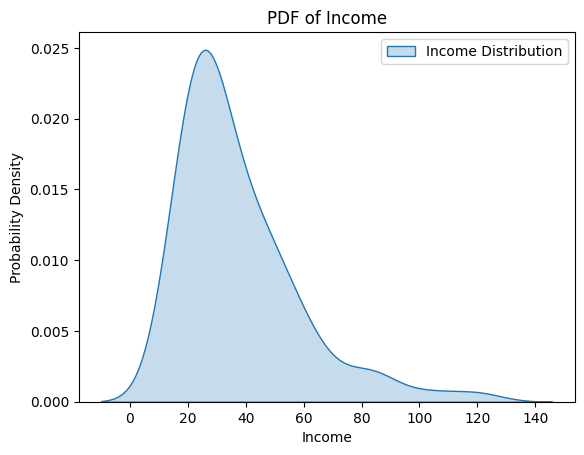

In [439]:
# retrieving the data from the textbook online dataset
data_url = 'https://stat4ds.rwth-aachen.de/data/Income.dat'
income_data = pd.read_csv(data_url, delim_whitespace=True)

# figuring out mean and std
income_mean = income_data["income"].mean()
income_std = income_data["income"].std()


# Creating plot to visualize the distribution of observations in a dataset
sns.kdeplot(income_data["income"], label="Income Distribution", fill=True)

# Creating labels for the plot
plt.xlabel("Income")
plt.ylabel("Probability Density")
plt.title("PDF of Income")
plt.legend()

# Display the plot
plt.show()


(b)

I believe the most appropriate probability distribution would be the Gamma distribution
because it is rightly skewed, it has larger Y values, and the Y values are greater than 0. 

It seems to describe the data pretty well by covering a majority of income data and displaying appropriately where the mean is. The bell shape of the curve also helps me see that there is a higher density of income around the 80 thousand dollar income range. 

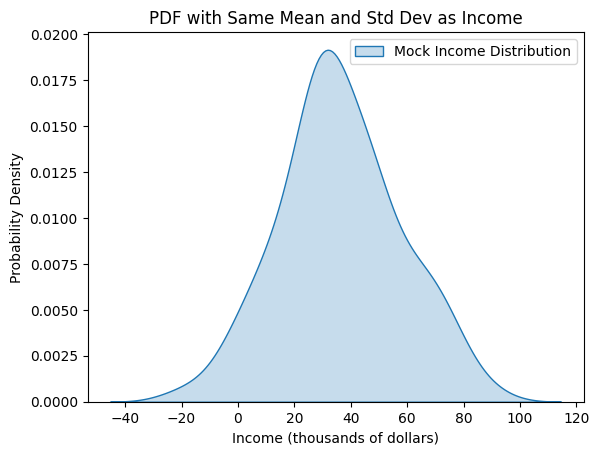

In [448]:
# Generate a set of random samples from a distribution with the same mean and standard deviation as the income values
samples = np.random.normal(loc=income_mean, scale=income_std, size=100)

# Plot the PDF of a normal distribution with the same mean and standard deviation as the income values
sns.kdeplot(samples, label="Mock Income Distribution", fill=True)

plt.xlabel("Income (thousands of dollars)")
plt.ylabel("Probability Density")
plt.title("PDF with Same Mean and Std Dev as Income")
plt.legend()
# Display the plot
plt.show()


## Problem # 2.21.

Plot the gamma distribution by fixing the shape parameter *k* = 3 and setting the scale parameter
= 0.5, 1, 2, 3, 4, 5. What is the effect of increasing the scale parameter? (See also Exercise 2.48.)

As the scale parameter increases, the mean and standard deviation both increase since in value. 

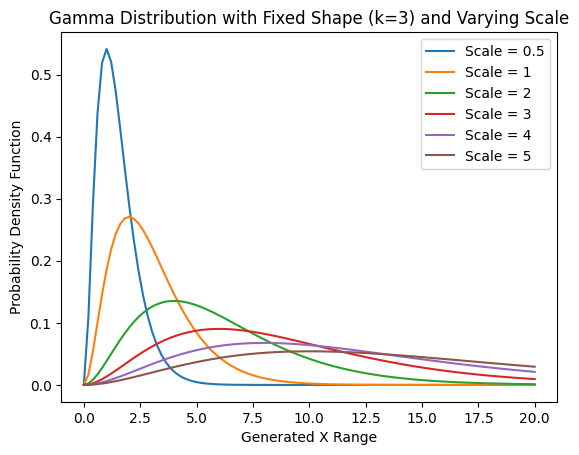

In [450]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fix the shape parameter k
k = 3

# Define the scale parameters
scale_parameters = [0.5, 1, 2, 3, 4, 5]

# Generate a range of values for x-axis
x = np.linspace(0, 20, 100)

# Plot the gamma distributions for each scale parameter
for scale in scale_parameters:
    # Calculate the PDF of the gamma distribution with fixed shape and varying scale
    pdf = stats.gamma.pdf(x, k, scale=scale)
    
    # Plot the PDF
    plt.plot(x, pdf, label=f"Scale = {scale}")

# Add labels and a legend to the plot
plt.xlabel("Generated X Range")
plt.ylabel("Probability Density Function")
plt.title("Gamma Distribution with Fixed Shape (k=3) and Varying Scale")
plt.legend()

# Display the plot
plt.show()


## Problem # 2.22.

Consider the mammogram diagnostic example in Section 2.1.4.

(a) Show that the joint probability distribution of diagnosis and disease status is as shown in
Table 2.6. Given that a diagnostic test result is positive, explain how this joint distribution
shows that the 12% of incorrect diagnoses for the 99% of women not having breast cancer
swamp the 86% of correct diagnoses for the 1% of women actually having breast cancer.  
(b) The first test for detecting HIV-positive status had a sensitivity of 0.999 and specificity
of 0.9999. Explain what these mean. If at that time 1 in 10,000 men were truly HIVpositive, find the positive predictive value. Based on this example, explain the potential
disadvantage of routine diagnostic screening of a population for a rare disease.

**TABLE 2.6** Joint probability distribution for disease status and diagnosis of breast cancer
mammogram, based on conditional probabilities in Table 2.1

| **Disease Status** | **Diagnosis from Mammogram** |              |           |
|--------------------|------------------------------|--------------|-----------|
|                    | Positive (+)                 | Negative (-) | **Total** |
| Yes (D)            | 0.0086                       | 0.0014       | 0.01      |
| No ($D^c$)         | 0.1188                       | 0.8712       | 0.99      |

(a)  
This demonstrates that when a diagnostic test result is positive, the high rate of false positives (93.25%) among the 99% of women without breast cancer overwhelms the relatively low rate of true positives (6.75%) among the 1% of women with breast cancer. This is due to the significantly larger population of women without breast cancer compared to those with breast cancer.

In [204]:
import pandas as pd

# Define the contingency table data
data = {
    'Disease_Status': ['Yes (D)', 'No (𝐷𝑐)'],
    'Positive_mamogram': [0.0086, 0.1188],
    'Negative_mamogram': [0.0014, 0.8712],
    'total': [0.01, 0.99]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the Disease_Status column as the index
df.set_index('Disease_Status', inplace=True)

# Calculate the conditional probabilities given a positive mamogram
prob_pos_diagnosis = df.loc['Yes (D)', 'Positive_mamogram'] / df.loc[:, 'Positive_mamogram'].sum()
prob_pos_no_diagnosis = df.loc['No (𝐷𝑐)', 'Positive_mamogram'] / df.loc[:, 'Positive_mamogram'].sum()

# Calculate the probabilities given a positive mamogram
prob_diagnosis_given_pos = df.loc['Yes (D)', 'Positive_mamogram'] / df.loc[:, 'Positive_mamogram'].sum()
prob_no_diagnosis_given_pos = df.loc['No (𝐷𝑐)', 'Positive_mamogram'] / df.loc[:, 'Positive_mamogram'].sum()

# Calculate the probabilities given a negative mamogram
prob_diagnosis_given_neg = df.loc['Yes (D)', 'Negative_mamogram'] / df.loc[:, 'Negative_mamogram'].sum()
prob_no_diagnosis_given_neg = df.loc['No (𝐷𝑐)', 'Negative_mamogram'] / df.loc[:, 'Negative_mamogram'].sum()

# Print the probabilities
print("Conditional Probabilities given a positive mamogram:")
print("P(Diagnosis | Positive) =", round(prob_diagnosis_given_pos,4))
print("P(No Diagnosis | Positive) =", round(prob_no_diagnosis_given_pos,4))
print()
print("Conditional Probabilities given a negative mamogram:")
print("P(Diagnosis | Negative) =", round(prob_diagnosis_given_neg,4))
print("P(No Diagnosis | Negative) =", round(prob_no_diagnosis_given_neg,4))

Conditional Probabilities given a positive mamogram:
P(Diagnosis | Positive) = 0.0675
P(No Diagnosis | Positive) = 0.9325

Conditional Probabilities given a negative mamogram:
P(Diagnosis | Negative) = 0.0016
P(No Diagnosis | Negative) = 0.9984


(b)  

Sensitivity refers to the conditional probability that the diagnostic test is positive given that the person has the disease.

Specificity refers to the conditional probability that the diagnostic test is negative given that the person does not have the disease

The disadvantage of routine screenings for a rare disease like this example is that there could be a lot of false positives depending on the prevalance of the disease. This could cause unnessarily stress and unneeded medical services for people who tested positive but did not truly have the disease. 

In [453]:
sensitivity = 0.999
specificity = 0.9999
prevalence = 1 / 10000

# Using the PPV formula
ppv = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

print("Positive Predictive Value (PPV):", round(ppv,2))

Positive Predictive Value (PPV): 0.5


## Problem # 2.26.

Refer to Table 2.4 cross classifying happiness with family income.

(a) Find and interpret the correlation using scores (i) (1, 2, 3) for each variable, (ii) (1, 2, 3)
for family income and (1, 4, 5) for happiness.  
(b) Construct the joint distribution that has these marginal distributions and exhibits independence of *X* and *Y* .

`(a)`   

In [454]:
data = {
    'Family Income': ['Below average', 'Average', 'Above average', 'Total'],
    'Not too happy': [0.080, 0.043, 0.017, 0.140],
    'Pretty happy': [0.198, 0.254, 0.105, 0.557],
    'Very happy': [0.079, 0.143, 0.081, 0.303],
    'Total': [0.357, 0.440, 0.203, 1.000]
}

# Create the DataFrame
df = pd.DataFrame(data)

display(df)

fam_income = pd.Series((1,2,3))
fam_happy = pd.Series((1,2,3))
fam_happy2 = pd.Series((1,4,5))

approx_cor = np.corrcoef(fam_income, fam_happy)
print("For i) the correlation is ", approx_cor[0][1])

approx_cor = np.corrcoef(fam_income, fam_happy2)
print("For ii) the correlation is: \n", round(approx_cor[0][1], 2))

,Family Income,Not too happy,Pretty happy,Very happy,Total
0,Below average,0.080,0.198,0.079,0.357
1,Average,0.043,0.254,0.143,0.440
2,Above average,0.017,0.105,0.081,0.203
3,Total,0.140,0.557,0.303,1.000


For i) the correlation is  1.0
For ii) the correlation is: 
 0.96


`(b)`

In [465]:
# Retriving the marginal distributions for X and Y using data from part a
marginal_X = df['Total']
marginal_Y = df.iloc[3,[1,2,3,4]].reset_index(drop=True)

# Adding the joint distribution to the table in addition to the Independent X and Y
df['X'] = marginal_X
df['Y'] = marginal_Y
df['Joint'] = marginal_X * marginal_Y

display(df)

,Family Income,Not too happy,Pretty happy,Very happy,Total,X,Y,Joint
0,Below average,0.080,0.198,0.079,0.357,0.357,0.14,0.04998
1,Average,0.043,0.254,0.143,0.440,0.440,0.557,0.24508
2,Above average,0.017,0.105,0.081,0.203,0.203,0.303,0.061509
3,Total,0.140,0.557,0.303,1.000,1.000,1.0,1.0


## Problem # 2.27.

The distribution of *X* = heights *(cm)* of women in the U.K. is approximately *N*(162, $7^2$).
Conditional on *X = x*, suppose *Y* = weight *(kg)* has a *N*(3.0 + 0.40x, $8^2$) distribution. Simulate
and plot 1000 observations from this approximate bivariate normal distribution. Approximate
the marginal means and standard deviations for *X* and *Y*. Approximate and interpret the
correlation.


The correlation between the distributions is ~0.34 which represents there is a weak correlation between height and weight but that some exists. 

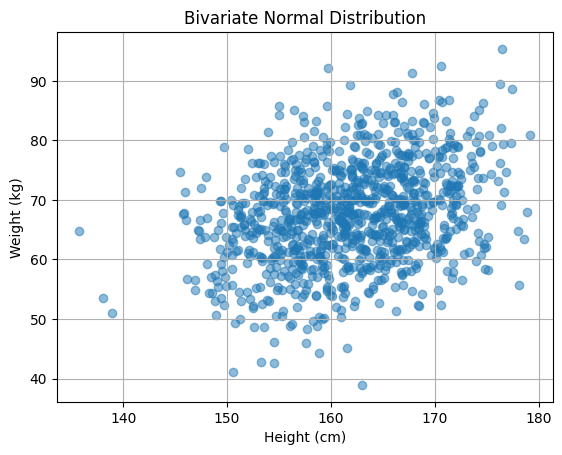

Approximate marginal means:
X: 161.86
Y: 67.6

Approximate marginal standard deviations:
X: 6.91
Y: 8.45
Approximate correlation: 0.31


In [466]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000  # Number of samples
# Grabbed parameters from the given distributions
mean_X = 162
std_X = 7
mean_Y = 3.0
slope_YX = 0.40
std_Y = 8

# Generate 1000 random samples from X distribution
X = np.random.normal(mean_X, std_X, n)

# Generate 1000 random samples from Y distribution conditional on X
Y = np.random.normal(mean_Y + 0.40 * X, std_Y)

# Plot the scatter plot of X and Y
plt.scatter(X, Y, alpha=0.5) # adding some 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Bivariate Normal Distribution')
plt.grid(True)
plt.show()


# # Approximate marginal means and standard deviations
approx_mean_X = round(np.mean(X), 2)
approx_std_X = round(np.std(X), 2)
approx_mean_Y = round(np.mean(Y), 2)
approx_std_Y = round(np.std(Y), 2)

print("Approximate marginal means:")
print("X:", approx_mean_X)
print("Y:", approx_mean_Y)
print()
print("Approximate marginal standard deviations:")
print("X:", approx_std_X)
print("Y:", approx_std_Y)

# Approximate correlation
approx_correlation = np.corrcoef(X, Y)
print("Approximate correlation:", round(approx_correlation[0, 1], 2))
